<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습내용

- 학습용 데이터와 평가용 데이터가 별도의 파일로 제공되는 경우가 있습니다.
- 이미 우리가 학습한 방법과는 조금 다른 접근이 필요합니다.
- 의료비 예측을 의뢰한 가상 고객의 요청을 처리해 봅니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 학습용 데이터 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance_train.csv'
data1 = pd.read_csv(path)

In [3]:
# 평가용 데이터 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance_test.csv'
data2 = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.
- 모델링에 집중하기 위해 본 실습에서는 탐색 과정을 생략합니다.

In [4]:
# 학습용 데이터 확인
data1

,age,sex,bmi,children,smoker,region,charges
0,41,female,31.600,0,no,southwest,6186.1270
1,30,male,25.460,0,no,northeast,3645.0894
2,18,female,30.115,0,no,northeast,21344.8467
3,61,female,29.920,3,yes,southeast,30942.1918
4,34,female,27.500,1,no,southwest,5003.8530
...,...,...,...,...,...,...,...
1233,50,male,30.970,3,no,northwest,10600.5483
1234,18,female,31.920,0,no,northeast,2205.9808
1235,18,female,36.850,0,no,southeast,1629.8335
1236,21,female,25.800,0,no,southwest,2007.9450


In [5]:
# 평가용 데이터 확인
data2 # 여긴 charges가 없음... 이걸 채워서 보내줘야함;

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast
96,54,female,30.800,3,no,southwest
97,55,male,38.280,0,no,southeast
98,56,male,19.950,0,yes,northeast


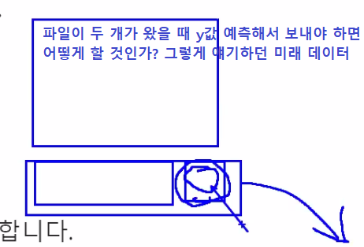

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

In [6]:
# 가변수화
dumm_cols = ['sex', 'smoker', 'region']
data1 = pd.get_dummies(data1, columns=dumm_cols, drop_first=True)

# 확인
data1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,41,31.600,0,6186.1270,0,0,0,0,1
1,30,25.460,0,3645.0894,1,0,0,0,0
2,18,30.115,0,21344.8467,0,0,0,0,0
3,61,29.920,3,30942.1918,0,1,0,1,0
4,34,27.500,1,5003.8530,0,0,0,0,1


**2) x, y 분리**

In [7]:
# x, y 분리
target = 'charges' 
x = data1.drop(target, axis=1)
y = data1.loc[:, target]

**3) 학습용, 평가용 데이터 분리**

In [8]:
# 학습용, 검증용 분리
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 우선 회귀 문제인지 분류 문제인지 명확히 구분합니다.

In [9]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [10]:
# 선언하기
model = DecisionTreeRegressor(max_depth=5, random_state=1)

In [11]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [12]:
# 예측하기
y_val_pred = model.predict(x_val)

In [13]:
# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))   

MAE: 2848.925847322852
R2: 0.8488510105762039


# 5.일반화된 성능

- 과연 앞에서 만든 모델의 일반화된 성능은 어떻게 될까요?
- 즉, 고객사에 어느 정도의 성능이 예상된다고 말할 수 있을까요?
- K-Fold CV로 일반화된 성능을 예측합니다.

In [14]:
# 불러오기
from sklearn.model_selection import cross_val_score

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=5)

# 결과
print(cv_score)
print('평균:', cv_score.mean())

[0.80393852 0.87010485 0.80735679 0.84036835 0.81403185]
평균: 0.8271600698665711


# 6. 성능 튜닝

- 앞에서 max_depth 값을 5로 고정함이 아쉽습니다.
- Grid Search로 최적의 하이퍼파라미터를 찾아봅니다.

In [15]:
# 불러오기
from sklearn.model_selection import GridSearchCV

# 기본 모델 선언
model_dt = DecisionTreeRegressor(random_state=1)

# 파라미터 선언
params = {'max_depth': range(1, 51)}

# 모델 선언
model = GridSearchCV(model_dt,
                     params,
                     cv=5, 
                     scoring='r2')                     

In [16]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 51)}, scoring='r2')

In [17]:
# 예측 결과 확인
print(model.best_params_)
print(model.best_score_) 

{'max_depth': 4}
0.83462894168412


In [18]:
# 성능 검증
y_val_pred = model.predict(x_val)
print(r2_score(y_val, y_val_pred)) 

0.8577535714634761


# 7.최종 평가

- 최적의 하이퍼파라미터로 학습된 모델로 예측합니다.
- 평가 데이터에 대해서도 필요한 전처리를 수행합니다.

In [19]:
# 평가 데이터 확인
data2.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [20]:
# 평가 데이터 가변수화
dumm_cols = ['sex', 'smoker', 'region']
data2 = pd.get_dummies(data2, columns=dumm_cols, drop_first=True)

# 확인
data2.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [21]:
# 예측하기
x_test = data2
y_pred = model.predict(x_test)

In [22]:
# 확인
y_pred[:10]

array([16167.41812   ,  6117.63435788,  6117.63435788,  5235.84631558,
        5235.84631558,  5235.84631558,  9579.59878583,  7672.04703104,
        7672.04703104, 12934.15456351])

# 8. 파일 제출

- 모델로 예측한 값을 파일에 붙여 엑셀 파일로 저장해 고객사에 제출합니다.

In [23]:
# 파일 다시 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance_test.csv'
final = pd.read_csv(path)

# 예측결과 추가
final['charges'] = y_pred.round(4)

# 확인
final

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16167.4181
1,18,male,33.770,1,no,southeast,6117.6344
2,28,male,33.000,3,no,southeast,6117.6344
3,33,male,22.705,0,no,northwest,5235.8463
4,32,male,28.880,0,no,northwest,5235.8463
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,6117.6344
96,54,female,30.800,3,no,southwest,12934.1546
97,55,male,38.280,0,no,southeast,15853.8025
98,56,male,19.950,0,yes,northeast,22921.2960


In [24]:
# 엑셀로 저장
final.to_excel('InsurancePred.xlsx')

# 9.정리

- 실제 의료비가 지출된 경우 우리 모델의 성능이 확인될 것입니다.
- 우리는 학습용 데이터로 나름 최선을 다했습니다.
- 그래도 뭔가 아쉬움이 남지요? 
- 성능이 더 좋은 알고리즘을 배워서 사용할 수 있다면....